# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Rafi Kyandra Atharizqi]
- **Email:** [kyandraatharizqi@gmail.com]
- **ID Dicoding:** [rafikyandraatharizqi]

## Menentukan Pertanyaan Bisnis

**day.csv**
- Bagaimana performa tingkat penggunaan/jumlah pengguna E-Bike pada Tahun 2011 - 2012 berdasarkan bulan?
- Pada musim apa penggunaan E-Bike paling banyak?
- Bagaimana persen pembagian antara pengguna registered dan casual?
- Bagaimana korelasi/ hubungan antara jumlah user dengan beberapa variabel cuaca numerik seperti temperatur, kecepatan angin, dan kelembapan?

**hour.csv**
- Pada jam berapakah user banyak menggunakan sepeda?

**day.csv additional question**
- Bagaimana pengelompokkan hari-hari berdasarkan tingkat keramaiannya variabel cuaca numeriknya?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import streamlit as st

## Data Wrangling

### Gathering Data

In [4]:
# Muat data berdasarkan jam
hour_df = pd.read_csv('data\\hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


data hour.csv berhasil dimuat

In [5]:
# Muat data berdasarkan hari
day_df = pd.read_csv('data\\day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


data day.csv berhasil dimuat

**Insight:**
- Kedua file csv berhasil dimuat ke dataframe, day.csv mewakili data berdasarkan hari dan hour.csv mewakili data berdasarkan jam

### Assessing Data

### *hour_df*

**Cek Tipe Data dan Missing Value**

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


dteday memiliki tipe data object, seharusnya tipe data datetime

Ada kejanggalan, seharusnya ada 17544 jam dalam rentang 1 Januari 2011 - 31 Januari 2024. Setiap jam seharusnya ada sebanyak 731 kali

In [7]:
# jumlah data jam (0-23)
hour_counts = hour_df['hr'].value_counts().sort_index()


print(hour_counts)

hr
0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: count, dtype: int64


Disini kita dapat melihat bahwa data per jam jumlahnya tidak sama, menandakan ada beberapa data yang hilang

**Cek Duplikat**

In [9]:
# Cek apakah ada yang terduplikat
hour_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Length: 17379, dtype: bool

Semua row dikembalikan sebagai false, berarti tidak ada yang terduplikat

**Cek Outlier**

In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Ada beberapa outlier dari kolom temp, atemp, hum, windspeed yang bernilai 0. Namun, untuk variabel cuaca numerik tersebut tidak kita gunakan untuk analisis dataframe ini. Kita akan menggunakan variabel cuaca numerik yang ada dalam days_df

### *days_df*

**Cek Tipe Data**

In [11]:
# Cek tipe data days_df (hari)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- Seharusnya dteday mempunyai tipe data datetime
- Seharusnya season, holiday, weekday, workingday, weathersit memiliki tipe data categorical
- Jumlah data sudah lengkap, sebanyak 731. Sesuai dengan banyaknya hari dari 1 Januari 2011 - 31 Desember 2012

**Cek Duplikat**

In [12]:
# Cek apakah ada yang terduplikat
day_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
726    False
727    False
728    False
729    False
730    False
Length: 731, dtype: bool

Tidak ada data yang terduplikat

**Cek Outlier**

In [13]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Ada indikasi outlier pada variabel cuaca numerik dan jumlah user(casual, registered, cnt)

In [15]:
# Mengecek outlier, terutama pada kolom 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'

# list kolom yang akan di check
check_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Function untuk mendeteksi outlier, parameter data berasal dari path data\\hour.csv
def detect_outliers(data):
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75) #Menemukan Q1 dan Q1
    iqr = q75 - q25 # Menemukan IQR, dimana IQR adalah selisih Q3-Q1
    cut_off = iqr * 1.5 # Nilai cut-off sebagai ambang batas minimum dan maksimum
    minimum, maximum = q25 - cut_off, q75 + cut_off # Menemukan nilai batas minimum dan maksimum
    outliers = [x for x in data if x < minimum or x > maximum]  # Apabila x lebih berada diluar nilai cut-off, maka dimasukkan ke list
    return outliers # Return outlier yang ada

# cek dengan looping
for column in check_columns: #iterasi pada list kolom yang akan di check
    outliers = detect_outliers(day_df[column]) # panggil fungsi detect_outliers yang sudah kita buat
    print(f'Outlier pada kolom {column}: {outliers}') # print list outlier yang di return




Outlier pada kolom temp: []
Outlier pada kolom atemp: []
Outlier pada kolom hum: [0.187917, 0.0]
Outlier pada kolom windspeed: [0.417908, 0.507463, 0.385571, 0.388067, 0.422275, 0.415429, 0.409212, 0.421642, 0.441563, 0.4148, 0.386821, 0.398008, 0.407346]
Outlier pada kolom casual: [2355, 2282, 3065, 2418, 2521, 2397, 3155, 2469, 2301, 2347, 3252, 2795, 2846, 2541, 2496, 2622, 3410, 2704, 2855, 3283, 2557, 2795, 2494, 2708, 2963, 2634, 2657, 2551, 2562, 2355, 2544, 2345, 2827, 2352, 2613, 2570, 3160, 2512, 2454, 2589, 3031, 2806, 2643, 2290]
Outlier pada kolom registered: []
Outlier pada kolom cnt: []


Beberapa outlier jumlahnya banyak dan dan dapat dijelaskan secara alami kecuali salah satu outlier hum dengan nilai 0.9

**Insight:**

- Kolom dteday bertipe data object, seharusnya tipe datanya adalah datetime64. 
- Berdasarkan keterangan dataset, kolom season, holiday, weekday, workingday, dan weathersit adalah data kategorikal. Oleh karena itu kita akan ganti tipe datanya menjadi categorical.


*df_hour*
- Jumlah dari semua kolum semua, yaitu 17389. Berarti tidak ada missing value.
- Disini saya menyadari bahwa seharusnya total ada 17544 jam dalam rentang waktu 1 Januari 2011 - 31 Desember 2012. Masing - masing jam (0-23) ada sebanyak 731 kali. Setelah dicek, ternyata ada beberapa data jam yang tidak ada atau row nya hilang. Data tersebut dapat kita interpolasi. Caranya dengan kita menghitung mean casual dan registered pada masing-masing jam dan menambahkannya pada row-row baru yang akan melengkapi  jam yang hilang di dataframe
- Tidak ada data yang terduplikasi.
- Kita akan berfokus pada kolom instant, dteday, hr, casual, registered, dan cnt untuk mengetahui rentang jam optimnal pengguna. Oleh karena itu, kita bisa drop kolom lainnya pada dataframe ini




*df_day*
- Jumlah dari semua kolum sama, yaitu 731. Berarti tidak missing value. Jumlah data sesuai dengan jumlah rentang hari dari 1 Januari 2011 - 31 Desember 2012
- Tidak ada data yang terduplikasi.
- Ada beberapa nilai maksimum yang tinggi, hal itu lebih mengindikasikan kepada outlier yang nyata daripada kesalahan pada input data.
- Ada nilai minimum bernilai 0, yaitu pada kolom hum.
- Outlier ditemukan pada kolom hum, windspeed, dan casual. Meskipun begitu, fluktuasi pada kolom casual berjumlah banyak dan berada pada angka yang konsisten, mengindikasikan kepada hari-hari tertentu atau acara tertentu yang dapat meningkatkan jumlah user casual di hari tersebut bertambah 
- Begitu pula dengan windspeed, outlier banyak dan masih masuk akal.
- Kolom hum memiliki outlier 0.0, hal ini mengindikasikan inaccurate data atau kesalahan manusia.
- Kita akan memilih kolom temp dan akan melakukan drop kolom atemp


### Cleaning Data

### *hour_df*

**Perbaiki Tipe Data dan drop kolom yang tidak digunakan**

In [16]:
# Mengganti tipe data kolom dteday dari object ke datetime64
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [17]:
# Melakukan drop kolom selain 'instant', 'dteday', 'hr', 'casual', 'registered', 'cnt'
hour_df = hour_df[['instant', 'dteday', 'hr', 'casual', 'registered', 'cnt']]

In [18]:
#cek lagi apakah berhasil
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   hr          17379 non-null  int64 
 3   casual      17379 non-null  int64 
 4   registered  17379 non-null  int64 
 5   cnt         17379 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 814.8+ KB


Tipe data berhasil diganti dan kolom yang tersisa sudah sesuai

**Mencari Mean**

Karena ada beberapa row atau baris data jam yang hilang, kita harus menyesuaikannya menjadi 731 dengan melakukan teknik interpolasi. Disini, kita akan mengisi baris data baru dengan mean dari registered dan casual per jam

In [19]:
# Kita cari mean registered dan casual dari masing - masing jam untuk mengisi data yang tidak ada, kemudian kita ganti data typenya ke integer
mean_hourly = hour_df.groupby('hr')[['registered', 'casual']].mean().round().astype(int)

print(mean_hourly)

    registered  casual
hr                    
0           44      10
1           27       7
2           18       5
3            9       3
4            5       1
5           18       1
6           72       4
7          201      11
8          337      22
9          188      31
10         127      46
11         149      60
12         185      68
13         181      72
14         165      76
15         176      75
16         238      74
17         387      74
18         364      61
19         263      49
20         190      36
21         144      28
22         109      22
23          73      15


**Melengkapi data jam yang hilang dengan interpolasi**

- Membuat dataframe baru dimana semua kolom hr lengkap dari range 1 Januari 2011 - 31 Desember 2012
- Menggabungkan dataframe tersebut dengan dataframe hour_df menjadi hourmerged_df
- Menambahkan kolom instant sebagai ID
- Menambahkan kolom interpolated untuk menandai apakah data tersebut terinterpolated
- Masukkan mean - mean yang sudah kita hitung sebelumnya ke dalam dataframe
- Menghitung jumlah cnt dengan registerd + casual

In [20]:
# Melengkapi data row hari yang hilang

# Buat dataframe yang lengkap untuk tanggal 1 Januari 2011 - 31 Desember 2012
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])  # Pastikan dteday menggunakan datetime data type
complete_dates = pd.date_range(start='2011-01-01', end='2012-12-31')  # Definisikan range
complete_data = pd.MultiIndex.from_product([complete_dates, range(24)], names=['dteday', 'hr'])
complete_df = pd.DataFrame(index=complete_data).reset_index()

# kita gabungkan dataframe tersebut dengan dataframe awal untuk membuat dataframe baru, sehingga row date yang hilang muncul
hourmerged_df = pd.merge(complete_df, hour_df, on=['dteday', 'hr'], how='left')

# kita tambahkan kolom instant sebagai ID untuk setiap row
hourmerged_df['instant'] = np.arange(1, len(hourmerged_df) + 1)  # Menambahkan kolom ID (instant)

# kita tambahkan kolom 'interpolated' untuk menandai data yang interpolated
hourmerged_df['interpolated'] = hourmerged_df['cnt'].isna()  # Menandai dimana data missing

# kita definisikan mean registered dan casual yang sudah kita cari sebelumnya
average_counts = {
    0: {'registered': 44, 'casual': 10},
    1: {'registered': 27, 'casual': 7},
    2: {'registered': 18, 'casual': 5},
    3: {'registered': 9,  'casual': 3},
    4: {'registered': 5,  'casual': 1},
    5: {'registered': 18, 'casual': 1},
    6: {'registered': 72, 'casual': 4},
    7: {'registered': 201, 'casual': 11},
    8: {'registered': 337, 'casual': 22},
    9: {'registered': 188, 'casual': 31},
    10: {'registered': 127, 'casual': 46},
    11: {'registered': 149, 'casual': 60},
    12: {'registered': 185, 'casual': 68},
    13: {'registered': 181, 'casual': 72},
    14: {'registered': 165, 'casual': 76},
    15: {'registered': 176, 'casual': 75},
    16: {'registered': 238, 'casual': 74},
    17: {'registered': 387, 'casual': 74},
    18: {'registered': 364, 'casual': 61},
    19: {'registered': 263, 'casual': 49},
    20: {'registered': 190, 'casual': 36},
    21: {'registered': 144, 'casual': 28},
    22: {'registered': 109, 'casual': 22},
    23: {'registered': 73, 'casual': 15}
}

# Masukkan mean-mean tersebut untuk mengisi kolom registered dan casual pada dataframe baru
for hour in range(24):
    hour_mask = (hourmerged_df['hr'] == hour) & (hourmerged_df['registered'].isna())
    hourmerged_df.loc[hour_mask, 'registered'] = average_counts[hour]['registered']
    hourmerged_df.loc[hour_mask, 'casual'] = average_counts[hour]['casual']

# Untuk setiap kolom cnt, kita jumlahkan registered + casual
hourmerged_df['cnt'] = hourmerged_df['registered'] + hourmerged_df['casual']

# kita pastikan agar ketiga kolom tersebut menggunakan tipe data int
hourmerged_df['cnt'] = hourmerged_df['cnt'].astype(int)
hourmerged_df['registered'] = hourmerged_df['registered'].astype(int)
hourmerged_df['casual'] = hourmerged_df['casual'].astype(int)

# kita cek dataframe baru
print(hourmerged_df)

# simpan dataframe baru ke csv
hourmerged_df.to_csv("hourmergedfixed_df.csv", index=False)

# kita cek apakah jumlah data sudah benar menjadi 17544
print(f"Number of rows in hourmergedfixed_df: {len(hourmerged_df)}")

          dteday  hr  instant  casual  registered  cnt  interpolated
0     2011-01-01   0        1       3          13   16         False
1     2011-01-01   1        2       8          32   40         False
2     2011-01-01   2        3       5          27   32         False
3     2011-01-01   3        4       3          10   13         False
4     2011-01-01   4        5       0           1    1         False
...          ...  ..      ...     ...         ...  ...           ...
17539 2012-12-31  19    17540      11         108  119         False
17540 2012-12-31  20    17541       8          81   89         False
17541 2012-12-31  21    17542       7          83   90         False
17542 2012-12-31  22    17543      13          48   61         False
17543 2012-12-31  23    17544      12          37   49         False

[17544 rows x 7 columns]
Number of rows in hourmergedfixed_df: 17544


Disini dapat kita lihat bahwa dataframe sudah memenuhi kebutuhan kita 

### *day_df*

**Mapping untuk konversi nilai beberapa kolom ke tipe data categorical dan ganti tipe data dteday ke datetime**


In [21]:


# Map untuk season
day_df['season'] = day_df['season'].map({
    1: 'Spring', 
    2: 'Summer', 
    3: 'Fall', 
    4: 'Winter'
})

# Map untuk holiday
day_df['holiday'] = day_df['holiday'].map({
    0: 'No Holiday', 
    1: 'Holiday'
})

# Map untuk weekday
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sunday', 
    1: 'Monday', 
    2: 'Tuesday', 
    3: 'Wednesday', 
    4: 'Thursday', 
    5: 'Friday', 
    6: 'Saturday'
})

# Map untuk workingday
day_df['workingday'] = day_df['workingday'].map({
    0: 'Not Working Day', 
    1: 'Working Day'
})

# Map untuk weathersit
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear, Few clouds, Partly cloudy', 
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds', 
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds', 
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
})

# Setelah mapping, ubah tipe datanya menjadi kategorikal
day_df['season'] = day_df['season'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['weekday'] = day_df['weekday'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')

In [22]:
# Mengganti tipe data kolom dteday dari object ke datetime64
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [23]:
# cek lagi apakah berhasil diganti
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(5), datetime64

Tipe-tipe data berhasil diganti

**Menangani Outlier**

Gunakan interpolasi, ganti nilai 0.0 dengan nilai rata-rata

In [24]:
# Menghitung rata-rata kolom 'hum' yang tidak bernilai 0.0
average_hum = day_df['hum'].mask(day_df['hum'] == 0).mean()

# Menggunakan mask() untuk mengganti nilai 0.0 dengan nilai rata-rata
day_df['hum'] = day_df['hum'].mask(day_df['hum'] == 0.0, average_hum)

# Cek perubahan pada dataframe
day_df.describe()

,instant,dteday,yr,mnth,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.500684,6.519836,0.495385,0.474354,0.628754,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,4.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,1.000000,7.000000,0.498333,0.486733,0.627500,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,1.000000,10.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,12.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,3.451913,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452


**Insight:**

*hour_df*
- Kita berhasil mengganti tipe dteday ke datetime64
- Kita berhasil membuat dataframe baru yang mempunya jumlah data debanyak 17544, sehingga sesuai dengan jumlah jam pada rentang waktu 1 Januari 2011 - 31 Februari 2012. Row-row baru tersebut, untuk nilai registered dan casual kita isi dengan mean kolom tersebut per jam.
- Dataframe baru tersebut kita namakan hourmeged_df
- Di dalam dataframe baru, kitabBerhasil melakukan drop kolom selain instant, dteday, hr, casual, registered, cnt

*day_df*

- Kita berhasil mengganti tipe dteday ke datetime64
- Berhasil melakukan mapping nilai untuk kolom season, holiday, weekday, workingday dan weather sit. Kemudian mengkonversi kolom - kolom tersebut ke tipe data categorical
- Menangani outlier pada kolom hum dengan teknik Imputation dengan mask(), mengganti outlier tersebut dengan mean kolom hum

## Exploratory Data Analysis (EDA)

### Explore hour_df

In [25]:
hourmerged_df.describe(include="all")

,dteday,hr,instant,casual,registered,cnt,interpolated
count,17544,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,17379
mean,2012-01-01 00:00:00,11.500000,8772.500000,35.481133,152.997036,188.478169,NaN
min,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,1.000000,NaN
25%,2011-07-02 00:00:00,5.750000,4386.750000,4.000000,33.000000,39.000000,NaN
50%,2012-01-01 00:00:00,11.500000,8772.500000,16.000000,115.000000,141.000000,NaN
75%,2012-07-02 00:00:00,17.250000,13158.250000,48.000000,219.000000,280.000000,NaN
max,2012-12-31 00:00:00,23.000000,17544.000000,367.000000,886.000000,977.000000,NaN


Disini kita memastikan bahwa dapat melihat bahwa nilai registered relatif lebih banyak daripada nilai casual

In [26]:
# Mengelompokkan berdasarkan kolom hr dan menghitung total untuk kolom casual, registered, dan cnt
total_users_per_hour = hourmerged_df.groupby('hr')[['casual', 'registered', 'cnt']].sum().reset_index()

# Tampilkan hasil
print(total_users_per_hour)

    hr  casual  registered     cnt
0    0    7425       31975   39400
1    1    4758       19644   24402
2    2    3492       13228   16720
3    3    1995        6587    8582
4    4     908        3724    4632
5    5    1026       13501   14527
6    6    3041       52547   55588
7    7    8081      146938  155019
8    8   15849      246588  262437
9    9   22582      137732  160314
10  10   33973       92976  126949
11  11   43526      108630  152156
12  12   49922      135251  185173
13  13   52857      132568  185425
14  14   55241      120893  176134
15  15   54756      128895  183651
16  16   53908      174152  228060
17  17   54294      283027  337321
18  18   44679      266368  311047
19  19   35652      192073  227725
20  20   26486      138742  165228
21  21   20654      105307  125961
22  22   16266       79739   96005
23  23   11110       53095   64205


Disini dapat dilihat bahwa banyak user yang menggunakan sepeda ketika tengah malam, hal tersebut secara perlahan menurun sampai jam 4 pagi. Terlihat kenaikan sejak jam 5 dimana loncatan dari Jam 6, 7, sampai 8 sangat drastis sebelum menurun lagi dari Jam 9 - jam 10. Terjadi kenaikan lagi dari Jam 11 hingga 12, dimana jumlah user relatif stagnan sampai kenaikan drastis dari jam 4 sore - jam 5 sore. Setelah itu, dari jam 6 sore jumlah pengguna akan mmenurun secara perlahan secara terus menerus hingga ke tengah malam.


In [27]:
hourmerged_df.head()

,dteday,hr,instant,casual,registered,cnt,interpolated
0,2011-01-01,0,1,3,13,16,False
1,2011-01-01,1,2,8,32,40,False
2,2011-01-01,2,3,5,27,32,False
3,2011-01-01,3,4,3,10,13,False
4,2011-01-01,4,5,0,1,1,False


### Explore day_df

In [28]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,NaN,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,No Holiday,Monday,Working Day,"Clear, Few clouds, Partly cloudy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,NaN,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,6.519836,NaN,NaN,NaN,NaN,0.495385,0.474354,0.628754,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,7.000000,NaN,NaN,NaN,NaN,0.498333,0.486733,0.627500,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,10.000000,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [29]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,No Holiday,Saturday,Not Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,No Holiday,Sunday,Not Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,No Holiday,Monday,Working Day,"Clear, Few clouds, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,No Holiday,Tuesday,Working Day,"Clear, Few clouds, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,No Holiday,Wednesday,Working Day,"Clear, Few clouds, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Jumlah user dalam 2 tahun**

In [30]:
# Menghitung total count keseluruhan
total_count = day_df['cnt'].sum()
print(f"Total user secara keseluruhan selama 2011 dan 2012: {total_count}")

# Menghitung total count per tahunnya
count_per_year = day_df.groupby('yr')['cnt'].sum()
print(f"Total user (cnt) per tahun:\n{count_per_year}")

Total user secara keseluruhan selama 2011 dan 2012: 3292679
Total user (cnt) per tahun:
yr
0    1243103
1    2049576
Name: cnt, dtype: int64


Disini dapat dilihat bahwa ada kenaikan dari tahun 2011 ke tahun 2012, menandakan adanya perkembangan.

**Jumlah user dalam 2 tahun, berdasarkan bulan**

In [31]:
# menggunakan groupby, gabungkan year (yr) dan mounth (mtnh), kemudian print hitung jumlah user (cnt)
user_count_per_month = day_df.groupby(['yr', 'mnth'])['cnt'].sum()


# print, dimana yr 0 adalah 2011 dan yr 1 adalah 2012, dan mnth sesuai dengan angkanya
print(user_count_per_month)

yr  mnth
0   1        38189
    2        48215
    3        64045
    4        94870
    5       135821
    6       143512
    7       141341
    8       136691
    9       127418
    10      123511
    11      102167
    12       87323
1   1        96744
    2       103137
    3       164875
    4       174224
    5       195865
    6       202830
    7       203607
    8       214503
    9       218573
    10      198841
    11      152664
    12      123713
Name: cnt, dtype: int64


Disini dapat dilihat bahwa bulan dengan jumlah pemakaian yang banyak ada di sekitar Mei (5) sampai Oktober (10), sebelum mengalami penurunan hingga Januari (1). Setelah itu, jumlah pengguna akan relatif meningkat sampai Mei kembali

**Jumlah user berdasarkan  musim**

In [32]:
# Group by season and sum the cnt column
user_count_per_season = day_df.groupby('season')['cnt'].sum().reset_index()

# Display the seasonal counts
print(user_count_per_season)

   season      cnt
0    Fall  1061129
1  Spring   471348
2  Summer   918589
3  Winter   841613


C:\Users\Rafi Kyandra\AppData\Local\Temp\ipykernel_23424\2195243886.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_count_per_season = day_df.groupby('season')['cnt'].sum().reset_index()


User pada musim gugur dan panas lebih banyak ketimbang dengan musim dingin dan semi

**Persentase pembagian user registered dan casual**

In [33]:
# Calculate total registered and casual users
total_registered_count = day_df['registered'].sum()
total_casual_count = day_df['casual'].sum()

# Calculate total users
total_users_count = total_registered_count + total_casual_count

# Calculate percentages
percentage_registered = (total_registered_count / total_users_count) * 100
percentage_casual = (total_casual_count / total_users_count) * 100

# Display the results
print(f'Jumlah user register: {total_registered_count}')
print(f'Jumlah user casual: {total_casual_count}')
print(f'Persentase jumlah user registered: {percentage_registered:.2f}%')
print(f'Persentase jumlah user casual: {percentage_casual:.2f}%')

Jumlah user register: 2672662
Jumlah user casual: 620017
Persentase jumlah user registered: 81.17%
Persentase jumlah user casual: 18.83%


jumlah user registered ternyata sangat lebih banyak daripada jumlah user casual

**Mencari hubungan antara jumlah user dengan variabel cuaca numerik**

In [34]:
# Ensure the relevant columns are present
# Select relevant columns for analysis
columns_for_analysis = ['temp', 'windspeed', 'hum', 'cnt']  # Using 'cnt' for total users

# Calculate the correlation matrix
correlation_matrix = day_df[columns_for_analysis].corr()

# Calculate the covariance matrix
covariance_matrix = day_df[columns_for_analysis].cov()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Display the covariance matrix
print("\nCovariance Matrix:")
print(covariance_matrix)

Correlation Matrix:
               temp  windspeed       hum       cnt
temp       1.000000  -0.157944  0.125131  0.627494
windspeed -0.157944   1.000000 -0.246223 -0.234545
hum        0.125131  -0.246223  1.000000 -0.114309
cnt        0.627494  -0.234545 -0.114309  1.000000

Covariance Matrix:
                 temp  windspeed        hum           cnt
temp         0.033508  -0.002241   0.003219  2.225147e+02
windspeed   -0.002241   0.006006  -0.002681 -3.521218e+01
hum          0.003219  -0.002681   0.019745 -3.111627e+01
cnt        222.514700 -35.212185 -31.116268  3.752788e+06


Ada indikasi korelasi positif  yang kuat antara cnt jumlah dengan temperatur, sedangkan korelasi negatif yang lemah antara jumlah user dengan kecepatan udara dan kelembapan

**Melakukan grouping berdasarkan kategori keramaian dan variabel cuaca numerik**

In [35]:
import pandas as pd

# Definisikan bin dan label untuk setiap kolom

# Bin untuk 'cnt' (bisa diubah sesuai kebutuhan)
cnt_bins = [0, 2000, 4000, float('inf')]
cnt_labels = ['Sepi', 'Keramaian Sedang', 'Ramai']

# Bin untuk 'temp'
temp_bins = [0, 0.4, 0.6, float('inf')]
temp_labels = ['Dingin', 'Sejuk', 'Hangat']

# Bin untuk 'hum' (Kelembaban)
hum_bins = [0, 0.5, 0.7, float('inf')]
hum_labels = ['Kering', 'Kelembapan Sedang', 'Lembap']

# Bin untuk 'windspeed' (Kecepatan Angin)
windspeed_bins = [0, 0.2, 0.4, float('inf')]
windspeed_labels = ['Tenang', 'Angin Sedang', 'Angin Kencang']

# Terapkan pd.cut untuk mengkategorikan setiap kolom
day_df['cnt_group'] = pd.cut(day_df['cnt'], bins=cnt_bins, labels=cnt_labels, include_lowest=True)
day_df['temp_group'] = pd.cut(day_df['temp'], bins=temp_bins, labels=temp_labels, include_lowest=True)
day_df['hum_group'] = pd.cut(day_df['hum'], bins=hum_bins, labels=hum_labels, include_lowest=True)
day_df['windspeed_group'] = pd.cut(day_df['windspeed'], bins=windspeed_bins, labels=windspeed_labels, include_lowest=True)

# Tampilkan DataFrame dengan grup baru
print(day_df[['cnt', 'cnt_group', 'temp', 'temp_group', 'hum', 'hum_group', 'windspeed', 'windspeed_group']])



      cnt         cnt_group      temp temp_group       hum          hum_group  \
0     985              Sepi  0.344167     Dingin  0.805833             Lembap   
1     801              Sepi  0.363478     Dingin  0.696087  Kelembapan Sedang   
2    1349              Sepi  0.196364     Dingin  0.437273             Kering   
3    1562              Sepi  0.200000     Dingin  0.590435  Kelembapan Sedang   
4    1600              Sepi  0.226957     Dingin  0.436957             Kering   
..    ...               ...       ...        ...       ...                ...   
726  2114  Keramaian Sedang  0.254167     Dingin  0.652917  Kelembapan Sedang   
727  3095  Keramaian Sedang  0.253333     Dingin  0.590000  Kelembapan Sedang   
728  1341              Sepi  0.253333     Dingin  0.752917             Lembap   
729  1796              Sepi  0.255833     Dingin  0.483333             Kering   
730  2729  Keramaian Sedang  0.215833     Dingin  0.577500  Kelembapan Sedang   

     windspeed windspeed_gr

Kita akan cari tahu jumlah per kombinasinya

In [36]:
# Menghitung jumlah per kombinasi grup
group_counts = day_df.groupby(['cnt_group', 'temp_group', 'hum_group', 'windspeed_group']).size().reset_index(name='count')

# Menampilkan hasil
print("Jumlah per kombinasi grup:")
print(group_counts)

Jumlah per kombinasi grup:
   cnt_group temp_group          hum_group windspeed_group  count
0       Sepi     Dingin             Kering          Tenang      9
1       Sepi     Dingin             Kering    Angin Sedang     14
2       Sepi     Dingin             Kering   Angin Kencang      3
3       Sepi     Dingin  Kelembapan Sedang          Tenang     20
4       Sepi     Dingin  Kelembapan Sedang    Angin Sedang     13
..       ...        ...                ...             ...    ...
76     Ramai     Hangat  Kelembapan Sedang    Angin Sedang     34
77     Ramai     Hangat  Kelembapan Sedang   Angin Kencang      0
78     Ramai     Hangat             Lembap          Tenang     44
79     Ramai     Hangat             Lembap    Angin Sedang     22
80     Ramai     Hangat             Lembap   Angin Kencang      0

[81 rows x 5 columns]


C:\Users\Rafi Kyandra\AppData\Local\Temp\ipykernel_23424\2934306130.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = day_df.groupby(['cnt_group', 'temp_group', 'hum_group', 'windspeed_group']).size().reset_index(name='count')


Disini dapat dilihat bahwa keramaian memiliki hubungan yang erat dengan temperatur, dimana ada sangat banyak hari yang ramai dengan cuaca hangat

**Insight:**

*hour_df*
- Disini dapat dilihat bahwa banyak user yang menggunakan sepeda ketika tengah malam, hal tersebut secara perlahan mmenurun sampai jam 4 pagi. Terlihat kenaikan sejak jam 5 dimana loncatan dari Jam 6, 7, sampai 8 sangat drastis sebelum menurun lagi dari Jam 9 - jam 10. Terjadi kenaikan lagi dari Jam 11 hingga 12, dimana jumlah user relatif stagnan sampai kenaikan drastis dari jam 4 sore - jam 5 sore. Setelah itu, dari jam 6 sore jumlah pengguna akan mmenurun secara perlahan secara terus menerus hingga ke tengah malam.


*day_df*
- Jumlah user meningkat dari 2011 ke 2012
- Jumlah user paling banyak untuk 2011 ada di bulan Juni, dan untuk 2012 pada september
- Jumlah user paling banyak ada di musinm gugur
- Jumlah user registered lebih banyak dariapada casual
- Hubungan positif antara jumlah user dengan temperatur
- Kategori hari ramai, hangat, kelembapan sedang, dan angin tenang adalah yang paling banyak

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana  tingkat penggunaan/jumlah user E-Bike pada Tahun 2011 - 2012 berdasarkan bulan?

Disini kita sudah mengetahui bahwa ada kenaikan user dari 2011 ke 2012

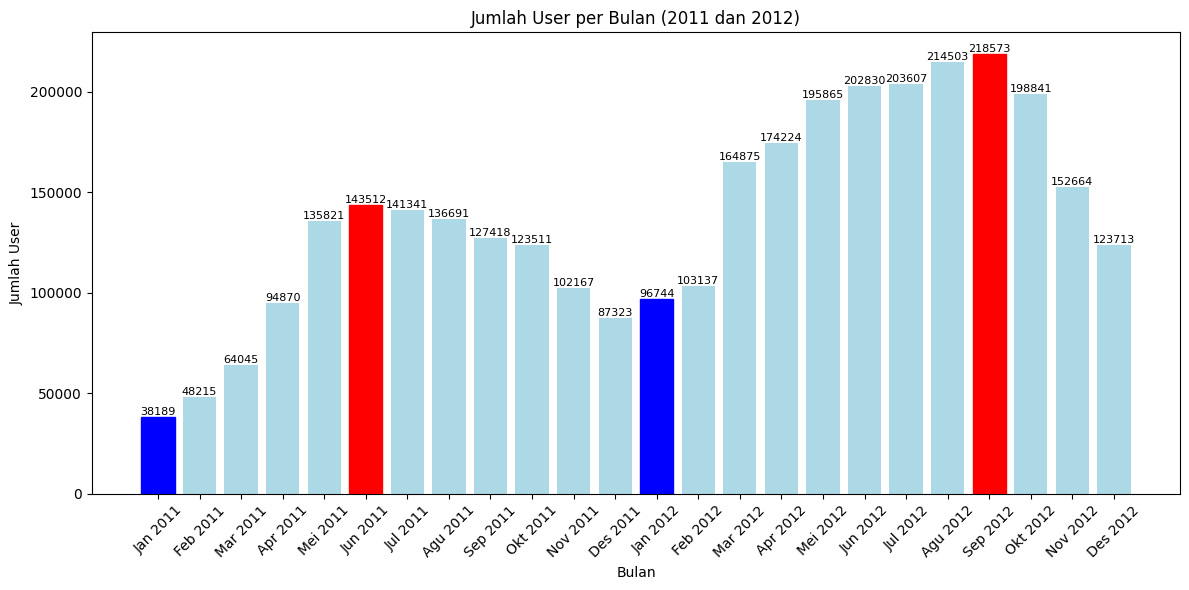

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Menghitung jumlah user per bulan untuk 2011 dan 2012
monthly_user_2011 = day_df[day_df['yr'] == 0].groupby('mnth')['cnt'].sum()
monthly_user_2012 = day_df[day_df['yr'] == 1].groupby('mnth')['cnt'].sum()

# Menggabungkan data 2011 dan 2012 secara berurutan
monthly_user_combined = np.concatenate([monthly_user_2011.values, monthly_user_2012.values])

# Membuat label untuk sumbu x, menggabungkan nama bulan untuk 2011 dan 2012
months_labels = ['Jan 2011', 'Feb 2011', 'Mar 2011', 'Apr 2011', 'Mei 2011', 'Jun 2011', 
                 'Jul 2011', 'Agu 2011', 'Sep 2011', 'Okt 2011', 'Nov 2011', 'Des 2011',
                 'Jan 2012', 'Feb 2012', 'Mar 2012', 'Apr 2012', 'Mei 2012', 'Jun 2012', 
                 'Jul 2012', 'Agu 2012', 'Sep 2012', 'Okt 2012', 'Nov 2012', 'Des 2012']

# Identifikasi bulan dengan user terbanyak dan tersedikit untuk tahun 2011 dan 2012
max_month_2011 = monthly_user_2011.idxmax() - 1  # indeks mulai dari 0
min_month_2011 = monthly_user_2011.idxmin() - 1
max_month_2012 = monthly_user_2012.idxmax() + 11  # tambahkan 12 agar sesuai dengan urutan kombinasi
min_month_2012 = monthly_user_2012.idxmin() + 11

# Membuat bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(np.arange(24), monthly_user_combined, color='lightblue')

# Warna merah untuk user terbanyak dan biru untuk tersedikit
bars[max_month_2011].set_color('red')
bars[min_month_2011].set_color('blue')
bars[max_month_2012].set_color('red')
bars[min_month_2012].set_color('blue')

# Menambahkan label di atas setiap bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), 
             ha='center', va='bottom', fontsize=8)

# Mengatur sumbu x
plt.xticks(np.arange(24), labels=months_labels, rotation=45)

# Memberi label dan judul
plt.xlabel('Bulan')
plt.ylabel('Jumlah User')
plt.title('Jumlah User per Bulan (2011 dan 2012)')

# Menampilkan plot
plt.tight_layout()
plt.show()




Jumlah user paling sedikit selalu terjadi pada bulan Januari, sedangkan jumlah user paling banyak ada pada bulan Juni dan September. Jumlah user mengalami penurunan sekitar penghujung akhir dan awal tahun kemudian meningkat lagi dan memuncak di pertangahan tahun. Dapat kita perhatikan juga bahwa terjadi peningkatan drastis dari perbandinga tahun 2011 ke 2012,  Ini menandakan pertumbuhan jumlah user yang signifikan. Kemudian, puncak penggunaan juga malah mendekati ke penghujung akhir tahun yang bisa menandakan antusiasme untuk menggunakan E-Bike meningkat.

### Pertanyaan 2: Pada musim apa penggunaan E-Bike paling banyak?

C:\Users\Rafi Kyandra\AppData\Local\Temp\ipykernel_23424\2844654290.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_counts_by_season = day_df.groupby('season')['cnt'].sum().sort_values(ascending=False)


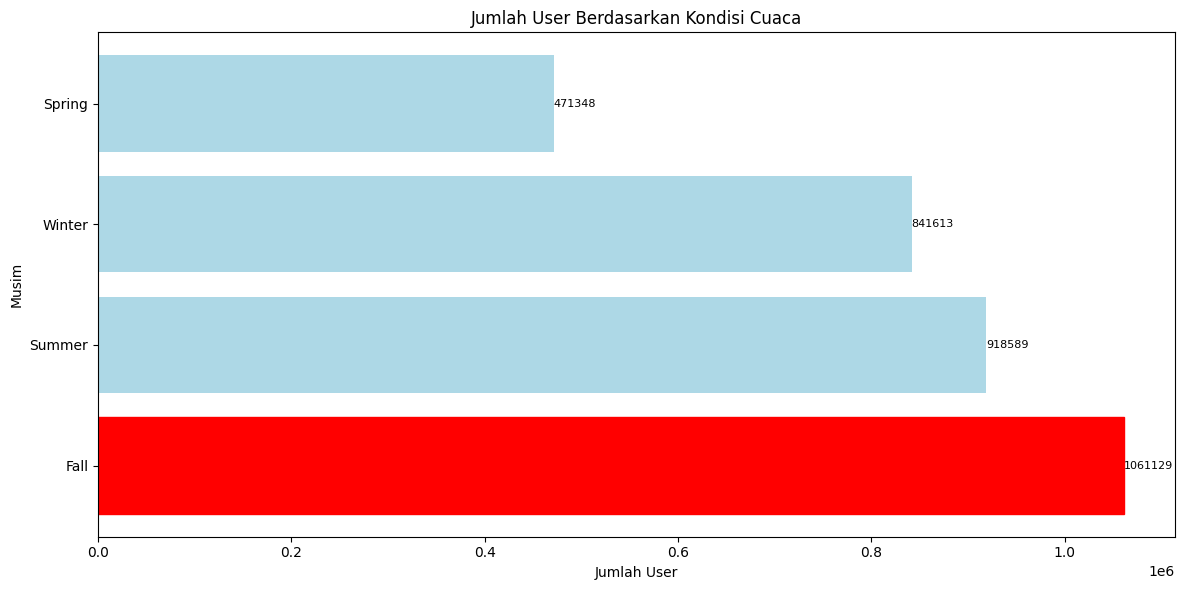

In [38]:
# Menghitung jumlah user per kategori weathersit
user_counts_by_season = day_df.groupby('season')['cnt'].sum().sort_values(ascending=False)

# Membuat bar chart horizontal
plt.figure(figsize=(12, 6))
bars = plt.barh(user_counts_by_season.index, user_counts_by_season.values, color='lightblue')

# Mengubah warna batang yang paling banyak
bars[0].set_color('red')  # Batang pertama adalah yang tertinggi

# Menambahkan label di sebelah kanan batang
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, int(bar.get_width()), 
             va='center', ha='left', fontsize=8)

# Memberi label dan judul
plt.xlabel('Jumlah User')
plt.ylabel('Musim')
plt.title('Jumlah User Berdasarkan Kondisi Cuaca')

# Menampilkan plot
plt.tight_layout()
plt.show()

Dapat dilihat bahwa musim gugur (fall) memiliki jumlah data paling banyak diikuti dengan summer. Sedangkan, jumlah user pada musim semi (spring) adalah yang paling sedikit

### Pertanyaan 3 : Bagaimana persen pembagian antara pengguna registered dan casual?

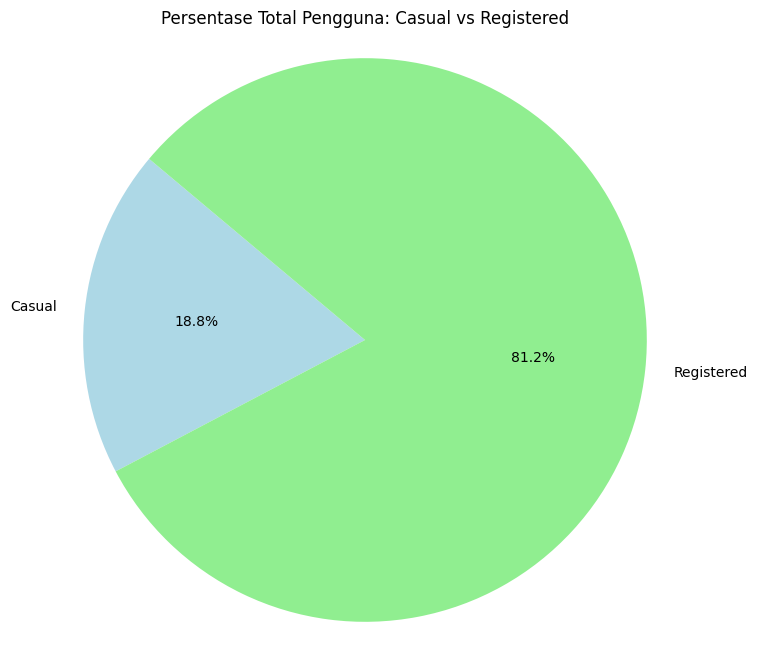

In [39]:
# Menghitung total casual dan registered users
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()

# Data untuk pie chart
labels = ['Casual', 'Registered']
sizes = [total_casual, total_registered]
colors = ['lightblue', 'lightgreen']  # Warna untuk pie chart

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Total Pengguna: Casual vs Registered')
plt.axis('equal')  # Menjaga rasio aspek lingkaran
plt.show()

Disini, diketahui bahwa user registered lebih banyak secara drastis daripada user casual.

### Pertanyaan 4 : Bagaimana korelasi/ hubungan antara jumlah user dengan beberapa variabel cuaca numerik seperti temperatur, kecepatan angin, dan kelembapan?

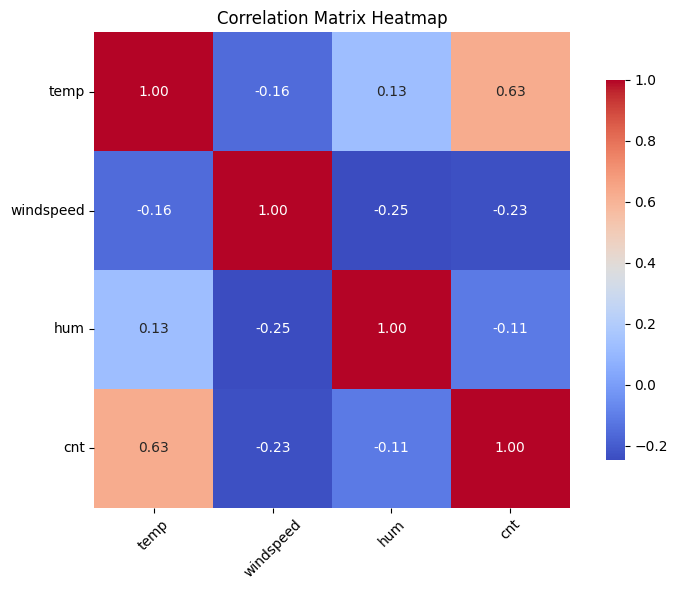

In [40]:
#Visualisasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Bisa dilihat bahwa ada hubungan positif yang signifiikan antara cnt (jumlah user dalam sehari) dengan temp atau temperatur, sedangkan hubungannya dengan windspeed dan humidity (kelembapan) adalah negatif tapi tidak terlalu signifikan.

### Pertanyaan 5 : Pada jam berapakah user banyak menggunakan sepeda?

    hr  casual  registered     cnt
0    0    7425       31975   39400
1    1    4758       19644   24402
2    2    3492       13228   16720
3    3    1995        6587    8582
4    4     908        3724    4632
5    5    1026       13501   14527
6    6    3041       52547   55588
7    7    8081      146938  155019
8    8   15849      246588  262437
9    9   22582      137732  160314
10  10   33973       92976  126949
11  11   43526      108630  152156
12  12   49922      135251  185173
13  13   52857      132568  185425
14  14   55241      120893  176134
15  15   54756      128895  183651
16  16   53908      174152  228060
17  17   54294      283027  337321
18  18   44679      266368  311047
19  19   35652      192073  227725
20  20   26486      138742  165228
21  21   20654      105307  125961
22  22   16266       79739   96005
23  23   11110       53095   64205


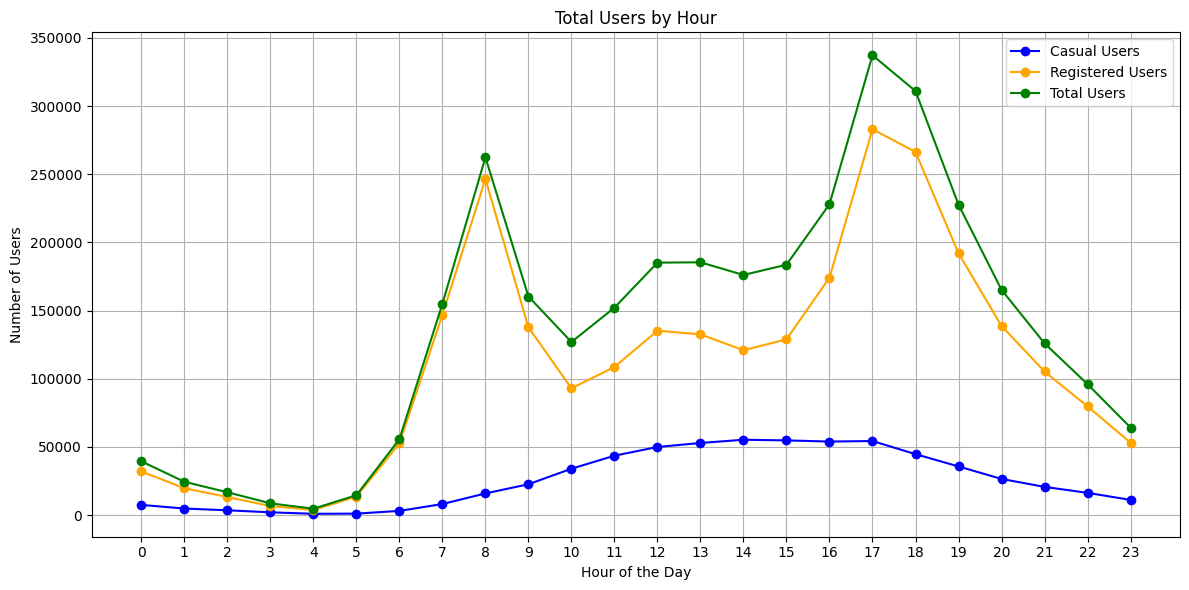

In [41]:
# Mengelompokkan berdasarkan kolom hr dan menghitung total untuk kolom casual, registered, dan cnt
total_users_per_hour = hourmerged_df.groupby('hr')[['casual', 'registered', 'cnt']].sum().reset_index()


print(total_users_per_hour)


plt.figure(figsize=(12, 6))
plt.plot(total_users_per_hour['hr'], total_users_per_hour['casual'], marker='o', label='Casual Users', color='blue')
plt.plot(total_users_per_hour['hr'], total_users_per_hour['registered'], marker='o', label='Registered Users', color='orange')
plt.plot(total_users_per_hour['hr'], total_users_per_hour['cnt'], marker='o', label='Total Users', color='green')
plt.title('Total Users by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Users')
plt.xticks(total_users_per_hour['hr'])  
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

User paling banyak menggunakan sepeda jam 17 atau 5 sore. Disini dapat dilihat ada beberapa jam - jam yang optimal. Pada pagi hari, di sekitar Jam 7 - 9. Siang hari di jam 12 - 15. Dan sore-malam hari di jam 16 - 19.

**Insight**
- Jumlah pengguna paling sedikit selalu tercatat pada bulan Januari, sementara jumlah pengguna tertinggi muncul pada bulan Juni dan September. Terdapat penurunan jumlah pengguna yang signifikan pada akhir tahun dan awal tahun berikutnya, diikuti dengan peningkatan yang kembali terjadi, mencapai puncaknya di pertengahan tahun. Selain itu, terlihat juga adanya lonjakan yang drastis antara tahun 2011 dan 2012, menunjukkan pertumbuhan pengguna yang signifikan. Puncak penggunaan yang mendekati akhir tahun menunjukkan bahwa antusiasme untuk menggunakan E-Bike semakin meningkat.
-  Pengurutan musim berdasarkan jumlah user adalah fall, summer, winter, spring
- Persentase jumlah user registered mendominasi jumlah user secara total
- Ada hubungan positif signifikan antara jumlah user dengan temperatur, dan ada hubungan negatif yang kecil anatara jumlah user dengan kelembapan dan kecepatan angin
- Jam 5 sore adalah jam dengan paling banyak pengguna


## Analisis Lanjutan (Opsional)

### Bagaimana pengelompokkan hari-hari berdasarkan tingkat keramaiannya dan variabel cuaca numeriknya?

In [42]:
# Menghitung jumlah per kombinasi grup
group_counts = day_df.groupby(['cnt_group', 'temp_group', 'hum_group', 'windspeed_group']).size().reset_index(name='count')

# Menampilkan hasil
print("Jumlah per kombinasi grup:")
print(group_counts)

Jumlah per kombinasi grup:
   cnt_group temp_group          hum_group windspeed_group  count
0       Sepi     Dingin             Kering          Tenang      9
1       Sepi     Dingin             Kering    Angin Sedang     14
2       Sepi     Dingin             Kering   Angin Kencang      3
3       Sepi     Dingin  Kelembapan Sedang          Tenang     20
4       Sepi     Dingin  Kelembapan Sedang    Angin Sedang     13
..       ...        ...                ...             ...    ...
76     Ramai     Hangat  Kelembapan Sedang    Angin Sedang     34
77     Ramai     Hangat  Kelembapan Sedang   Angin Kencang      0
78     Ramai     Hangat             Lembap          Tenang     44
79     Ramai     Hangat             Lembap    Angin Sedang     22
80     Ramai     Hangat             Lembap   Angin Kencang      0

[81 rows x 5 columns]


C:\Users\Rafi Kyandra\AppData\Local\Temp\ipykernel_23424\2934306130.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = day_df.groupby(['cnt_group', 'temp_group', 'hum_group', 'windspeed_group']).size().reset_index(name='count')


In [43]:
# Step 1: Calculate the counts per group combination
group_counts = day_df.groupby(['cnt_group', 'temp_group', 'hum_group', 'windspeed_group']).size().reset_index(name='count')

# Step 2: Sort the group counts by 'count' in descending order
sorted_group_counts = group_counts.sort_values(by='count', ascending=False)

# Step 3: Displaying all combinations
print("Jumlah per kombinasi grup (sorted):")
print(sorted_group_counts.to_string(index=False))  # Display all rows without index
plt.show()

Jumlah per kombinasi grup (sorted):
       cnt_group temp_group         hum_group windspeed_group  count
           Ramai     Hangat Kelembapan Sedang          Tenang     94
           Ramai      Sejuk Kelembapan Sedang          Tenang     47
           Ramai     Hangat            Lembap          Tenang     44
           Ramai      Sejuk            Lembap          Tenang     39
           Ramai     Hangat Kelembapan Sedang    Angin Sedang     34
Keramaian Sedang     Dingin Kelembapan Sedang          Tenang     32
           Ramai     Dingin Kelembapan Sedang          Tenang     27
           Ramai      Sejuk Kelembapan Sedang    Angin Sedang     25
           Ramai     Hangat            Kering          Tenang     25
           Ramai     Hangat            Lembap    Angin Sedang     22
Keramaian Sedang     Dingin Kelembapan Sedang    Angin Sedang     22
           Ramai      Sejuk            Kering    Angin Sedang     21
            Sepi     Dingin Kelembapan Sedang          Tenang     2

C:\Users\Rafi Kyandra\AppData\Local\Temp\ipykernel_23424\1734849412.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = day_df.groupby(['cnt_group', 'temp_group', 'hum_group', 'windspeed_group']).size().reset_index(name='count')


Setelah pengelompokkan, kita dapat mengkonfirmasi temuan kita bahwa ada hubungan antara variabel cuaca numerik dengan jumlah user. Hari yang memiliki jumlah user ramai banyak yang terjadi pada temperatur yang hangat dan sejuk. Sebaliknya, hari yang sepi biasanya memiliki temperatur yang dingin.

## Conclusion

**day.csv**
- Bagaimana performa tingkat penggunaan E-Bike pada Tahun 2011 - 2012 berdasarkan bulan?
    - Jawaban : Jumlah user meningkat secara dari 2011 ke 2012. Jumlah user terbanyak pada 2011 ada pada bulan Juni, sedangkan paling sedikit ada pada bulan Januari. Jumlah user terbanyak pada 2012 ada pada bulan September, sedangkan paling sedikit ada pada bulan Januari juga. Jumlah user akan memuncak cenderung pada pertengahan tahun, dan akan menurun di penghujung tahun sampai awal tahun berikutnya. Setelah itu, user akan meningkat sampai puncaknya di pertengahan tahun selanjutnya. Bulan dengan user terbanyak juga bergeser dari Juni (2011 ) ke September (2012) hal ini menunjukkan peningkatan jumlah dan antusiasme user untuk menggunakan E-Bike.

- Pada musim apa penggunaan E-Bike paling banyak?
    - Jawaban : Urutan jumlah dari yang terbanyak adalah musim gugur, musim panas, musim dingin, dan musim semi. Hal ini menunjukkan bahwa ada kecendurungan jumlah user lebih banyak pada musim yang terbilang hangat dan cerah daripada musim yang terbilang dingin dan sejuk.

- Bagaimana persen pembagian antara pengguna registered dan casual?
    - Jawaban : Jumlah user registered dengan persentasi 81.2% melampaui casual dengan persentasi 18.2%. Hal ini menunjukkan bahwa perusahaan E-Bike harus dapat mempertahankan user-base mereka. Hal tersebut dapat dilakukan dengan tidak melakukan kebijakan drastis yang dapat mengasingkan registered user. Hal ini mengingat jumlah user total secara keseluruhan masih bertambah dari tahun ke tahun sehingga perusahaan E-Bike dapat berfokus mempertahankan dan memanfaatkan momentum ini.
    
- Bagaimana korelasi/ hubungan antara jumlah user dengan beberapa variabel cuaca numerik seperti temperatur, kecepatan angin, dan kelembapan?
    - Jawaban : Ada hubungan positif yang signifikan antara jumlah user dengan temperatur, ini berarti semakin hangat temperatur maka semakin banyak user yang menggunakan layanan. Sedangkan, untuk kecepetanan angin dan kelembapan memiliki rhubungan negatif tapi tidak terlalu signifikan dengan jumlah user, sehingga secara teori semakin tenang angin dan semakin kering kelembapan akan menambah jumlah user. Perlu diingat bahwa korelasi jumlah user dengan temperatur melampaui korelasi jumlah user dengan kecepatan angin dan kelembapan.

**hour.csv**
- Pada jam berapakah user banyak menggunakan sepeda?
    - Jawaban : User paling banyak ada di jam 17 atau 5 sore. Kemudian ada beberapa jam optimal, pada pagi hari di jam 7 - 9, siang pada jam 12 - 15 dan sore-malam pada jam 16 - 19.

**day.csv additional question**
- Bagaimana pengelompokkan hari-hari berdasarkan tingkat keramaiannya dan variabel cuaca numeriknya?
    - Jawaban : Pengelompokkan seperti yang kita lihat sebelumnya, mempunyai pola yang sesuai dengan korelasi antara jumlah user dan variabel cuaca numerik yang kita temukan sebelumnya. Hari yang memiliki jumlah user ramai banyak yang terjadi pada temperatur yang hangat dan sejuk. Sebaliknya, hari yang sepi biasanya memiliki temperatur yang dingin.
